# K-Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from matplotlib import colors
from matplotlib.colors import ListedColormap



In [4]:
%store -r final
final.head()

105471.0

In [5]:
%store -r PC_scores
PC_scores

PC1       PC2       PC3
0     0.767100 -0.150594 -0.318901
1    -0.581359  0.105391 -0.026657
2     0.670462 -0.228139 -0.193459
3    -0.642377 -0.344450 -0.139859
4    -0.060591  0.147812  0.201383
...        ...       ...       ...
2090 -0.698926 -0.350366 -0.274557
2091  0.550897  0.246639 -0.375332
2092  0.502465 -0.434903 -0.080114
2093  0.534786  0.386858  0.343070
2094 -0.482304  0.577329  0.245355

[2095 rows x 3 columns]

## Determine Number of Clusters

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

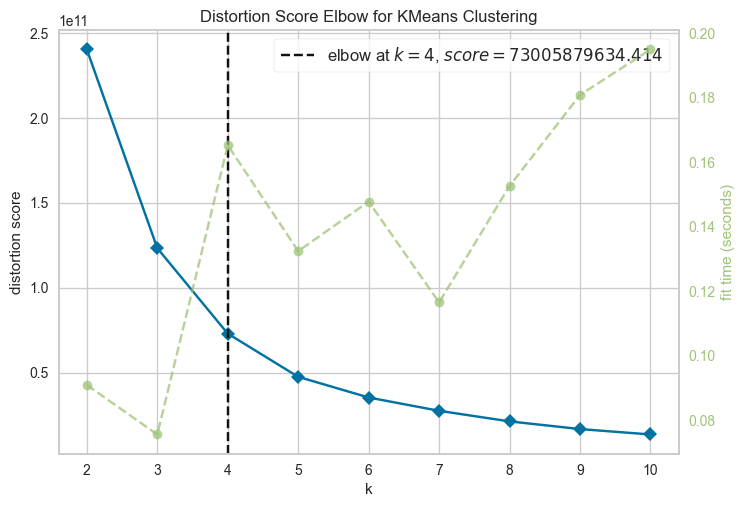

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# Quick examination of elbow method to find numbers of clusters to make.
Elbow_M = KElbowVisualizer(KMeans())
Elbow_M.fit(final)
Elbow_M.show()

In [15]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(PC_scores)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
X = np.array(PC_scores)

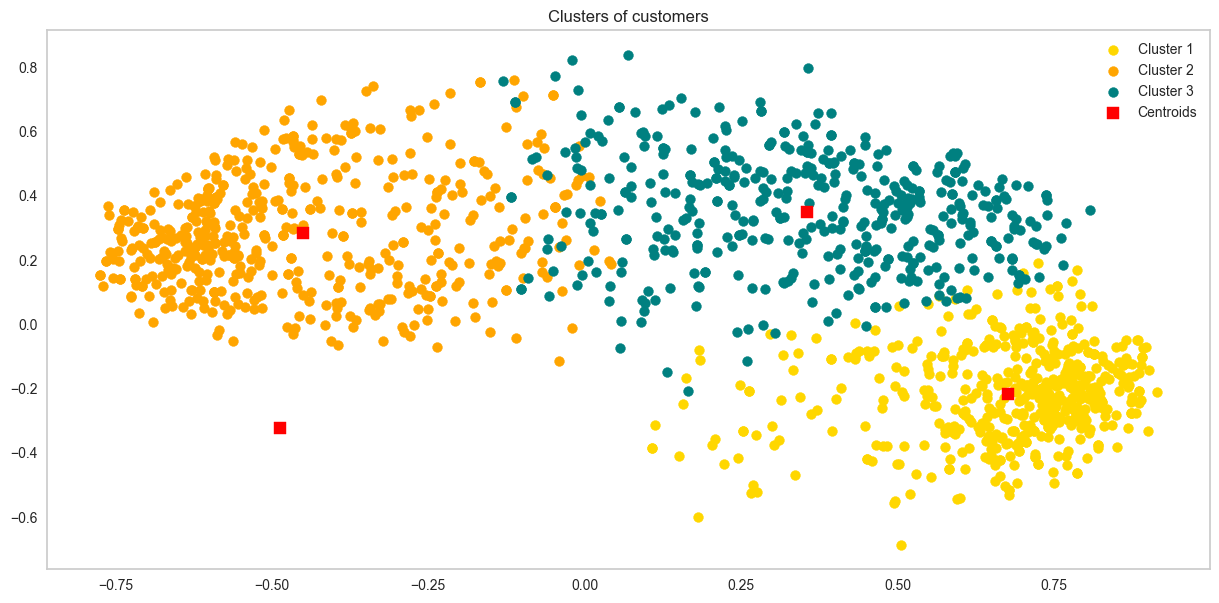

In [17]:
# Visualising the clusters
plt.figure(figsize=(15,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'gold', label = 'Cluster 1',s=50)
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'orange', label = 'Cluster 2',s=50)
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'teal', label = 'Cluster 3',s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',  label = 'Centroids',s=75,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.legend()
plt.show()


In [18]:
PC_scores['Clusters'] = y_kmeans
PC_scores

PC1       PC2       PC3  Clusters
0     0.767100 -0.150594 -0.318901         0
1    -0.581359  0.105391 -0.026657         1
2     0.670462 -0.228139 -0.193459         0
3    -0.642377 -0.344450 -0.139859         3
4    -0.060591  0.147812  0.201383         1
...        ...       ...       ...       ...
2090 -0.698926 -0.350366 -0.274557         3
2091  0.550897  0.246639 -0.375332         2
2092  0.502465 -0.434903 -0.080114         0
2093  0.534786  0.386858  0.343070         2
2094 -0.482304  0.577329  0.245355         1

[2095 rows x 4 columns]

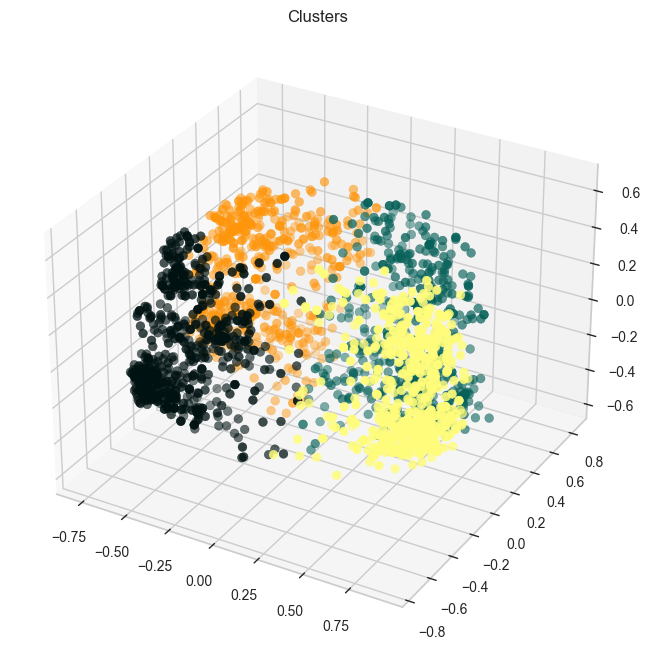

In [29]:
cmap = colors.ListedColormap(["#fffd7a", "#fcd421", "#ff950a", "#66baac", "#066159", "#011212"])

#Plotting the clusters
x =PC_scores["PC1"]
y =PC_scores["PC2"]
z =PC_scores["PC3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PC_scores["Clusters"], marker='o', cmap = cmap )
ax.set_title("Clusters")
#ax.view_init(-140, 60)
plt.show()

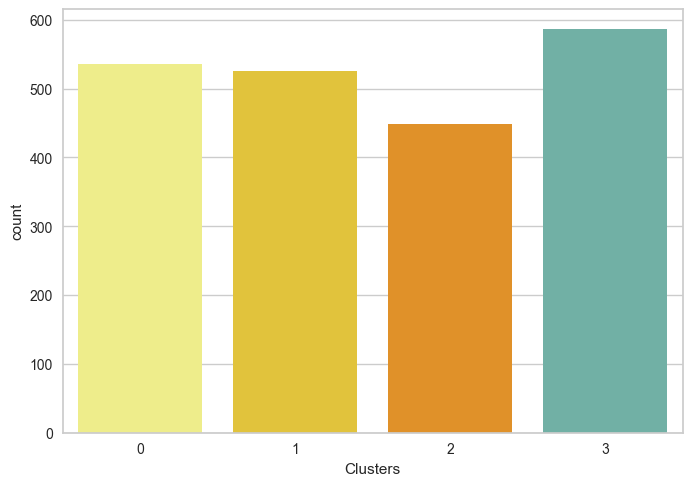

In [20]:
pal = ["#fffd7a", "#fcd421", "#ff950a", "#66baac", "#066159"]
pl = sns.countplot(x=PC_scores["Clusters"], palette= pal)
plt.show()

In [21]:
final['Cluster'] = y_kmeans
final.to_csv('/Users/alyssajuarez/Downloads/cluster.csv')  

In [23]:
g = final.groupby(['Cluster'])
c1 = g.get_group(0)
c2 = g.get_group(1)
c3= g.get_group(2)
c4= g.get_group(3)

In [40]:
def compare(df, ft):
    fig.suptitle(ft)
    sns.distplot(c1[ft], color = "#066159", hist=False)
    sns.distplot(c2[ft], color = "#66baac", hist=False)
    sns.distplot(c3[ft], color = "#ff950a", hist=False)
    sns.distplot(c4[ft], color = "#fcd421", hist=False)
    plt.show()

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



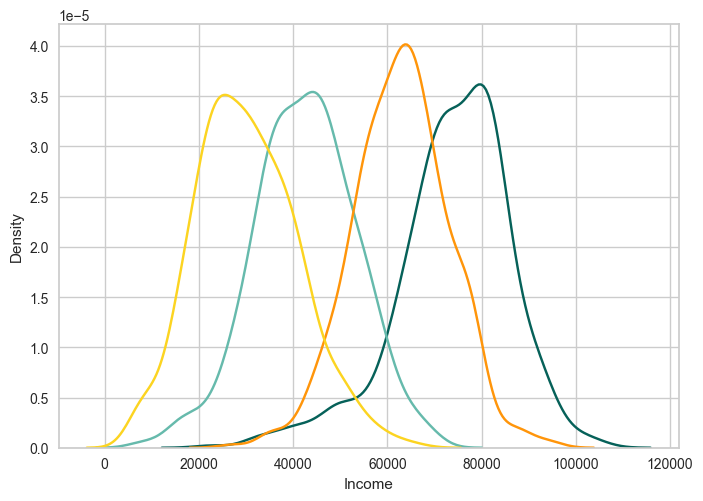

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



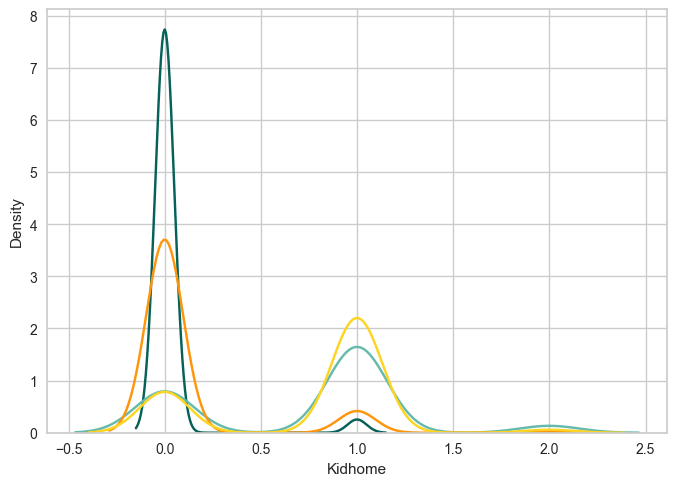

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



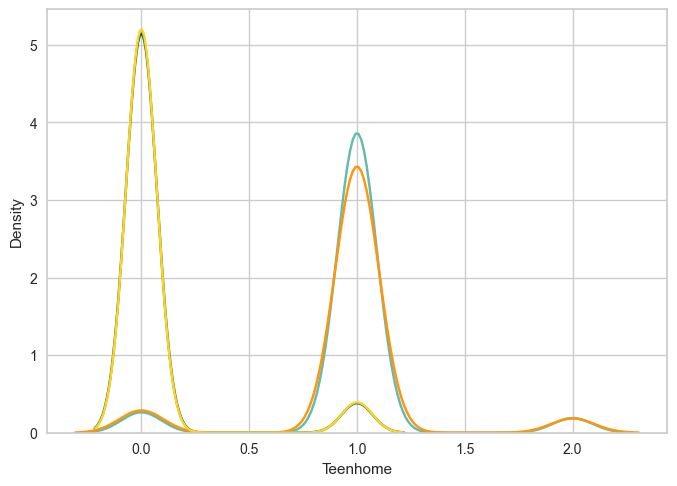

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



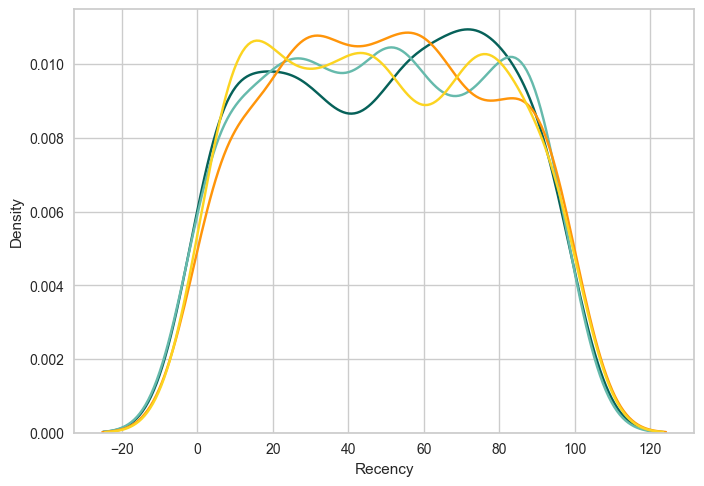

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



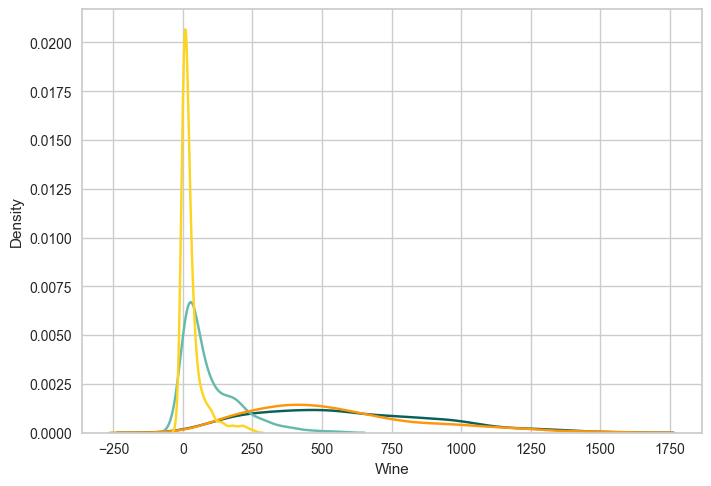

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



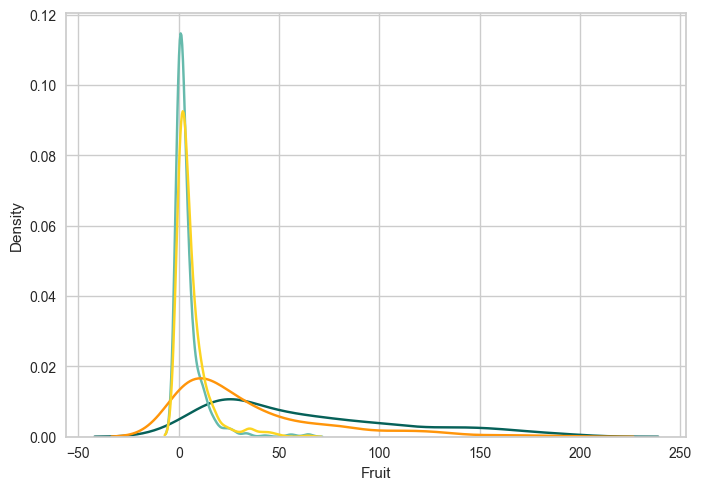

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



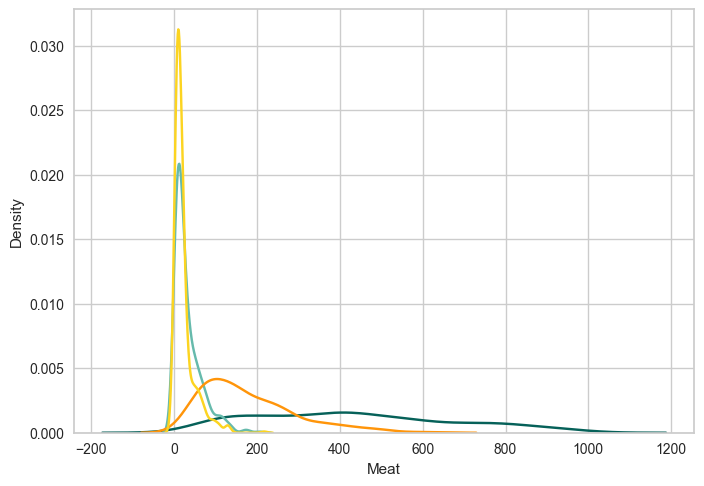

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



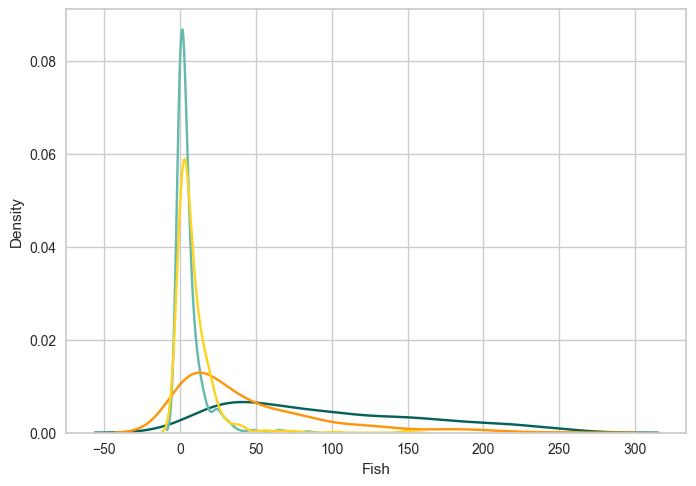

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



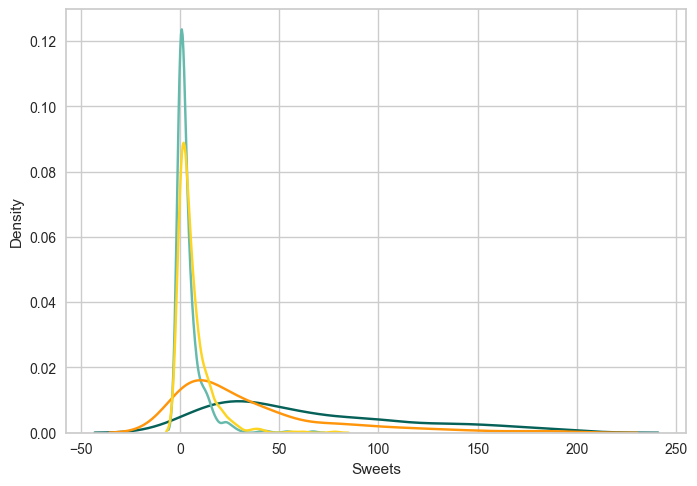

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



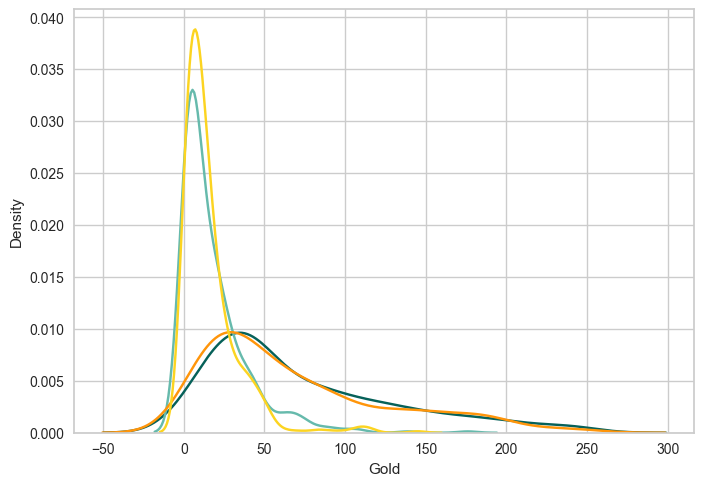

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



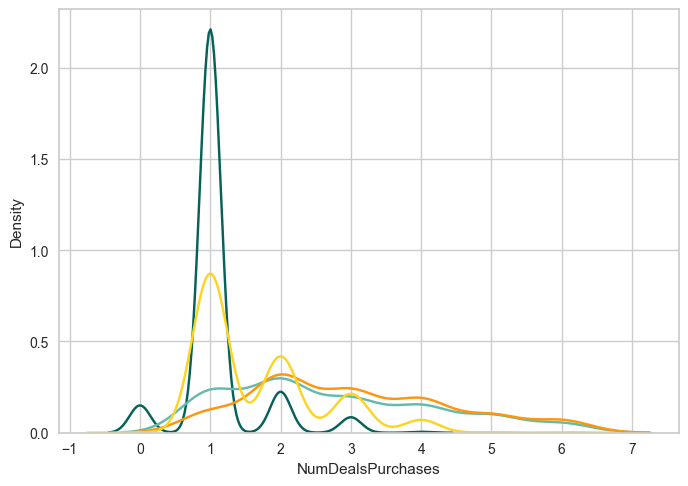

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



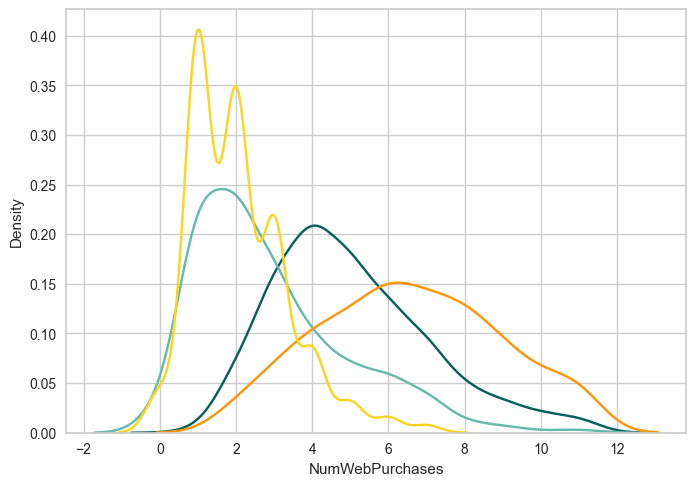

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



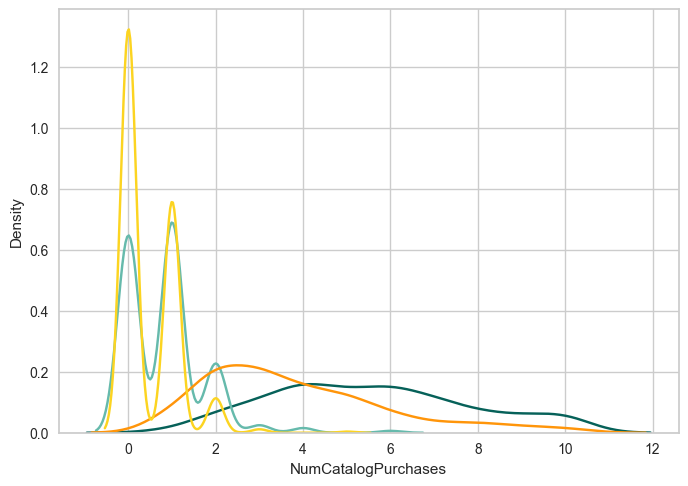

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



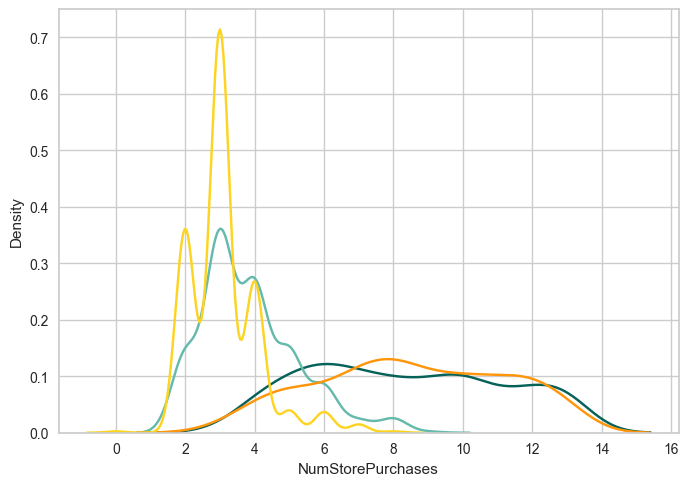

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



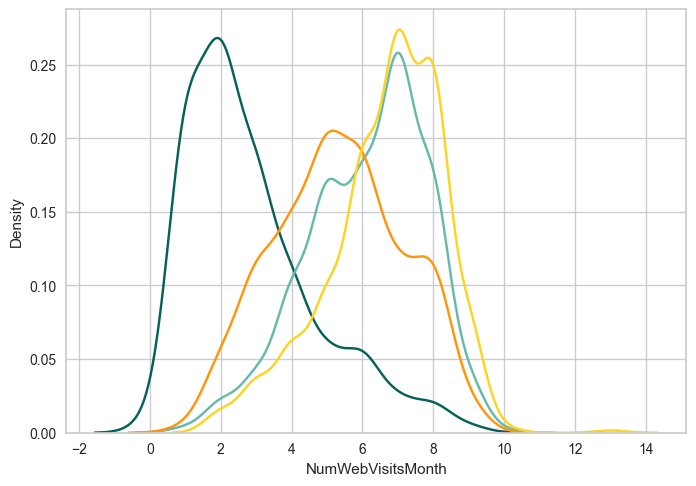

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



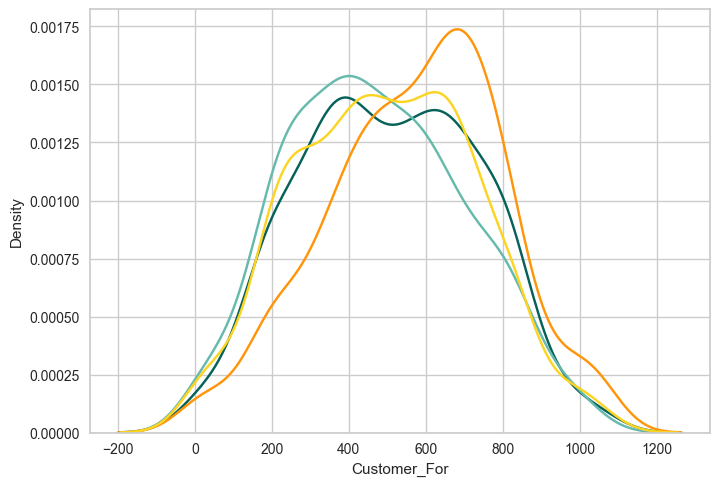

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



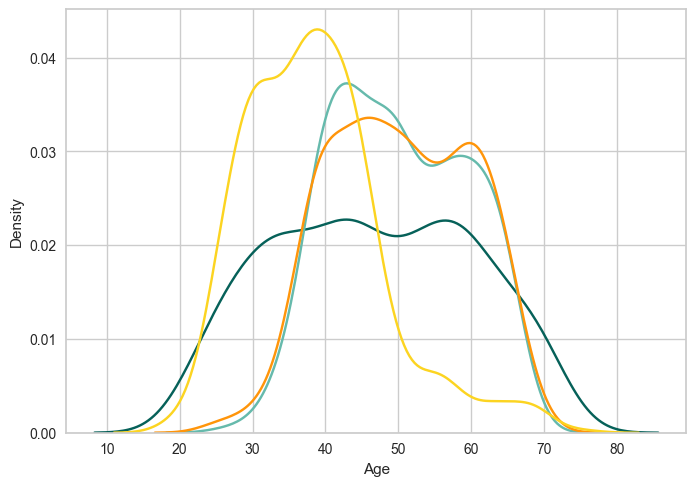

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



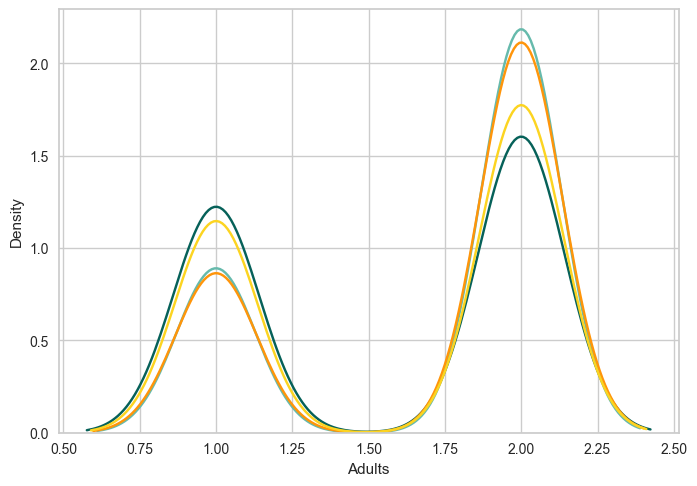

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



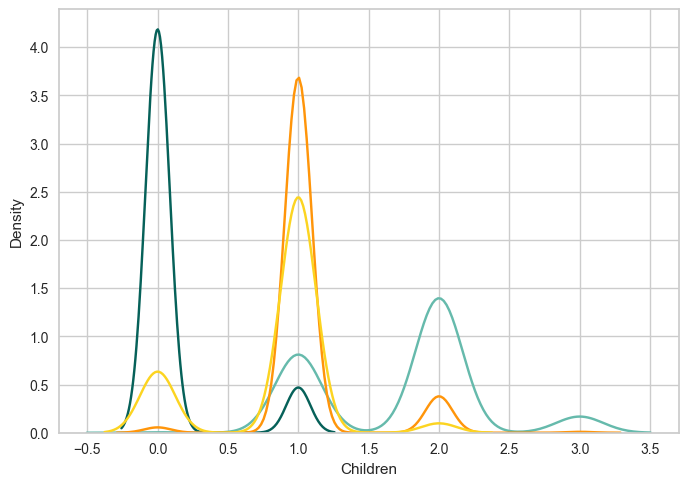

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



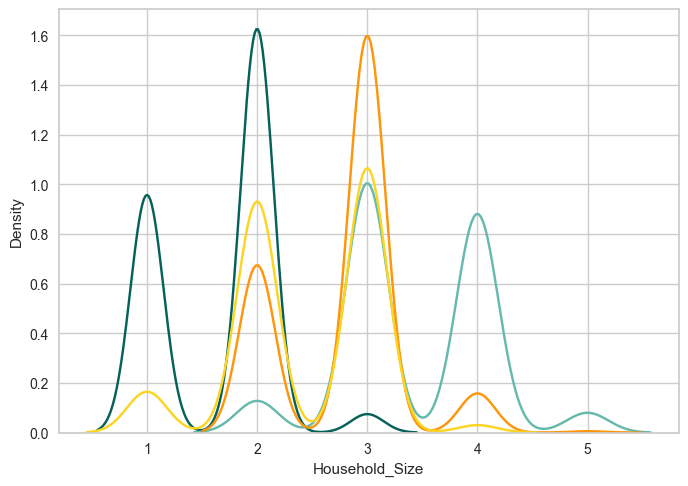

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



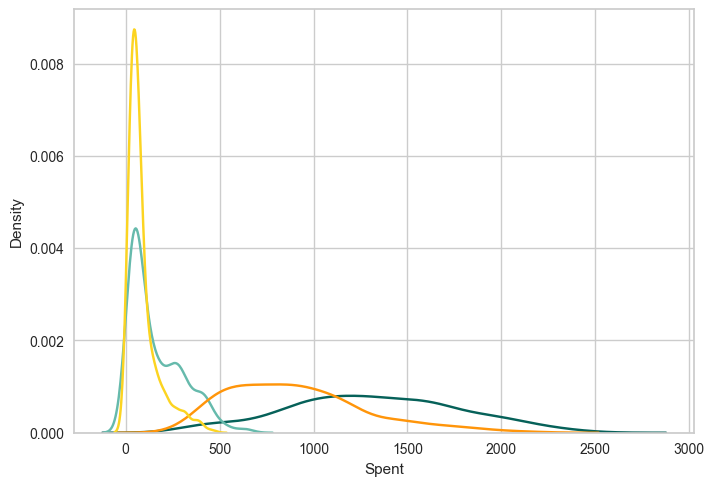

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt yo

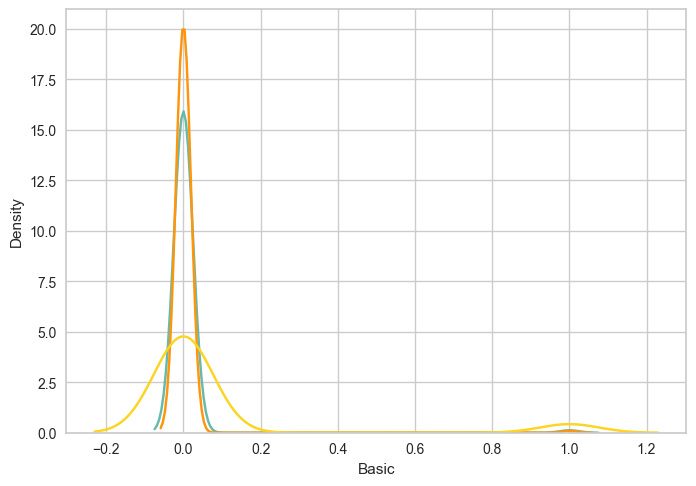

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



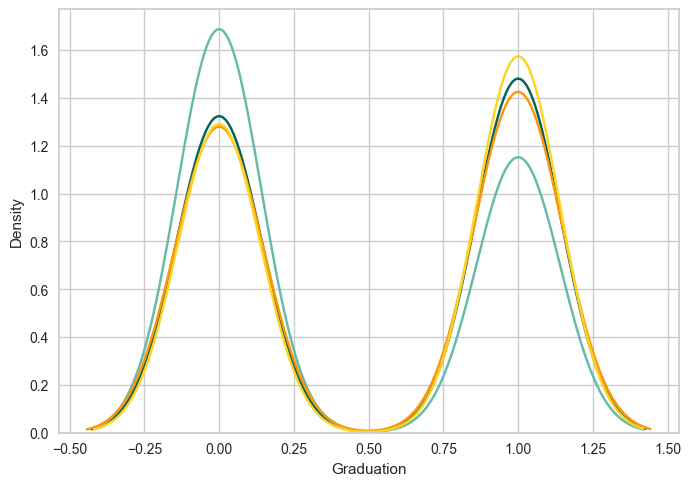

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



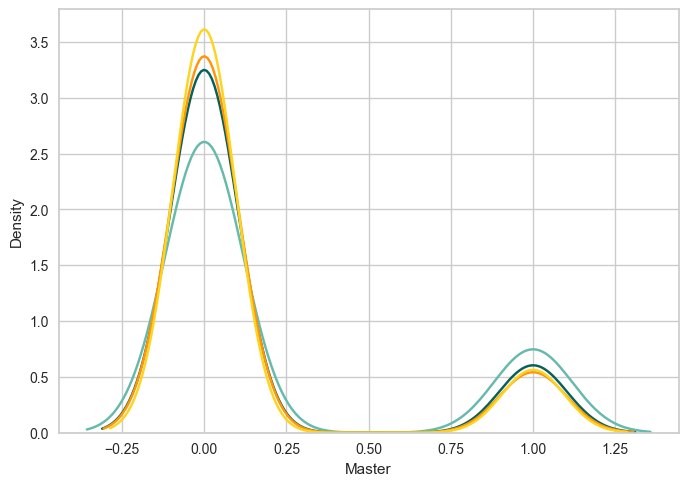

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



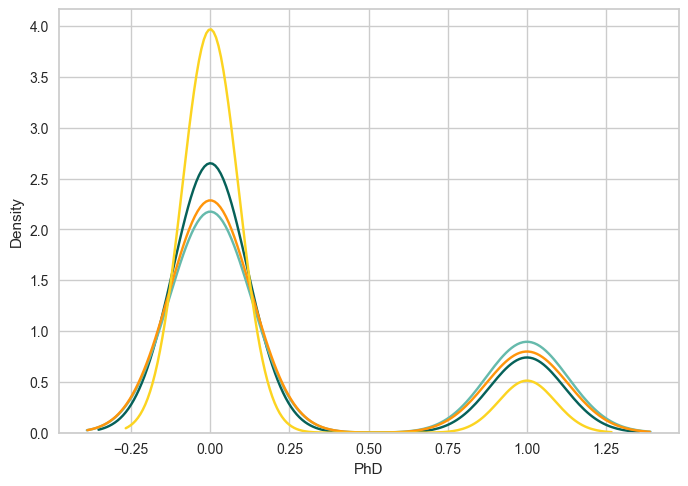

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_6218/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt yo

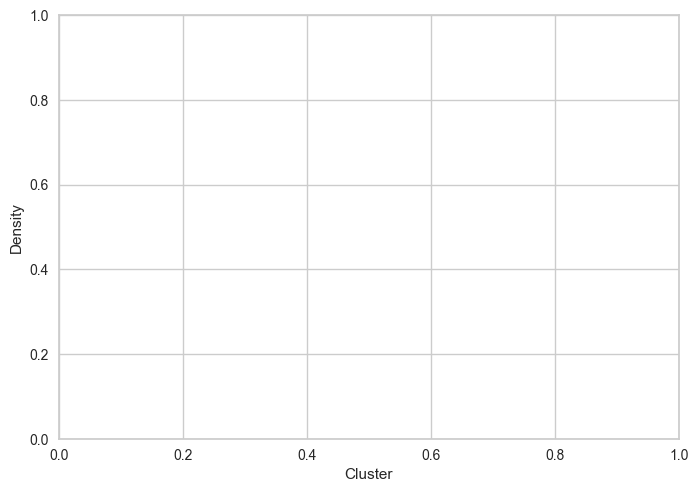

In [41]:
for feature in final:
    compare(final, feature)

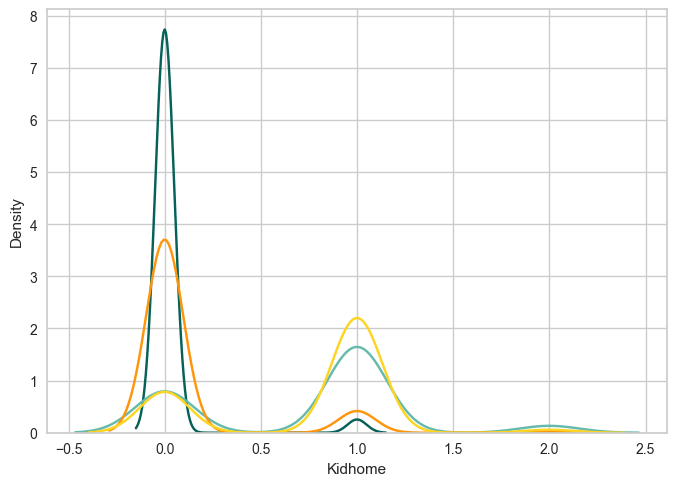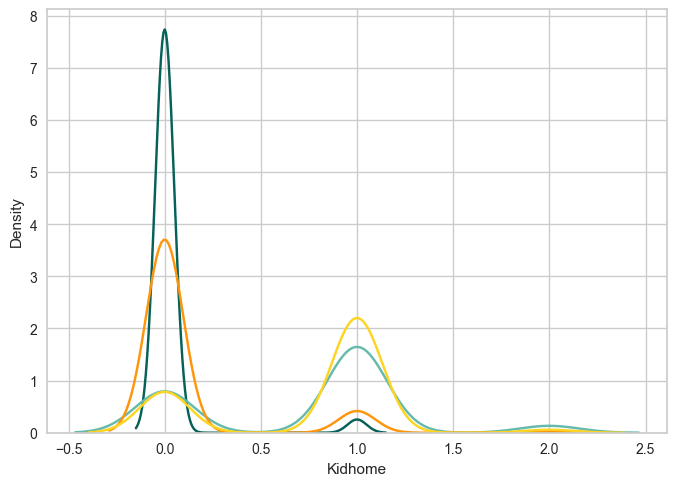

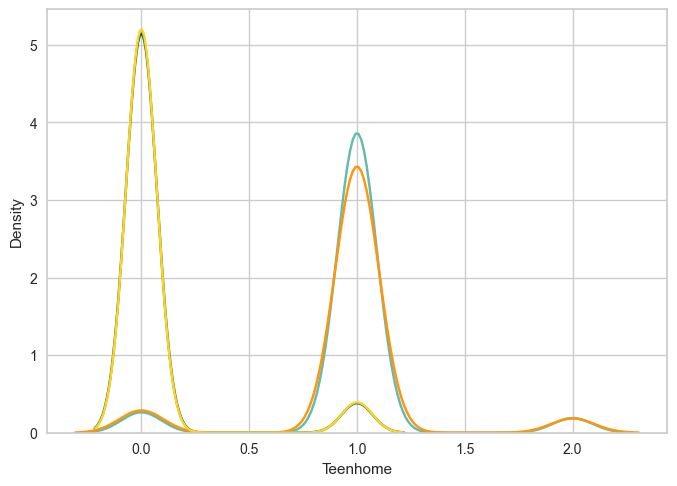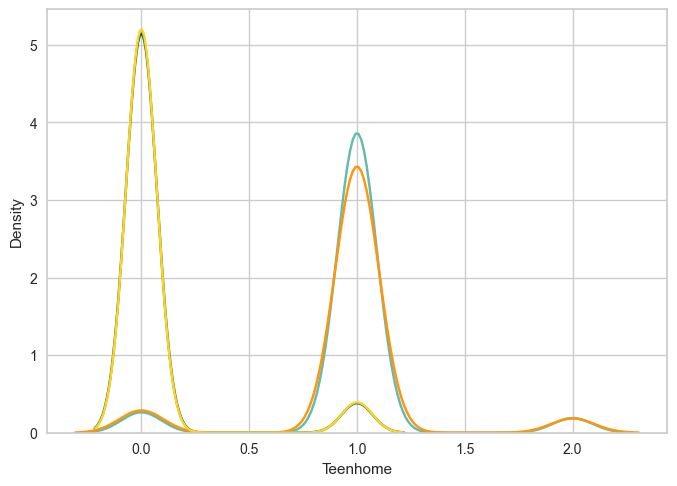

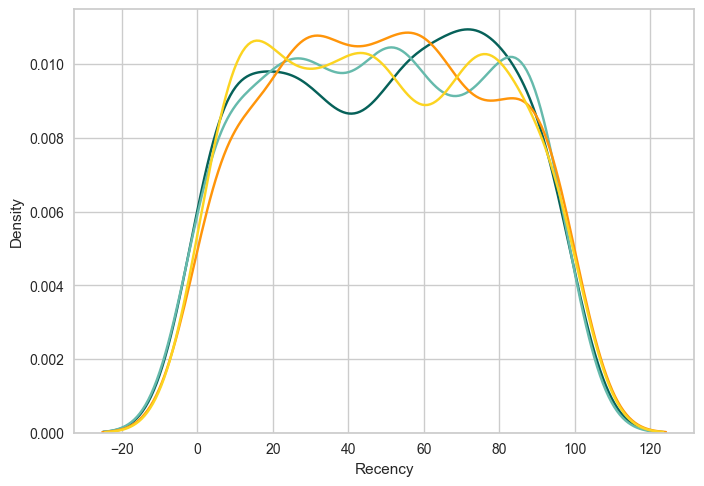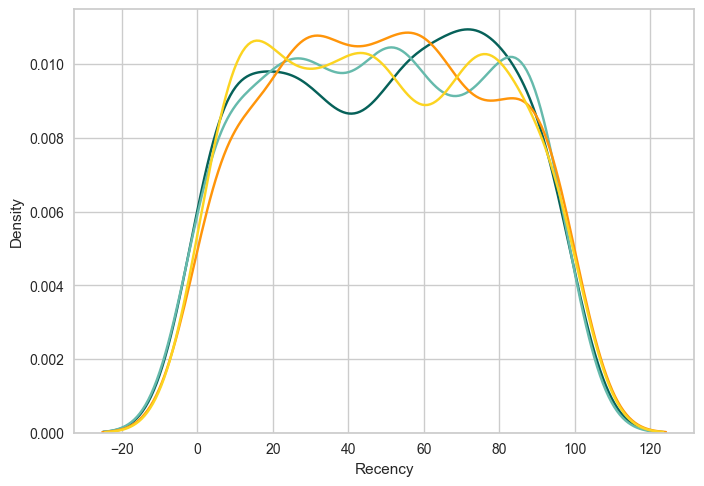

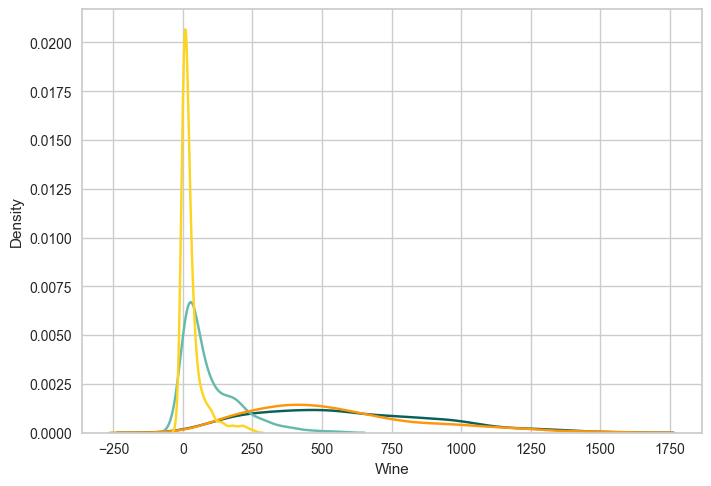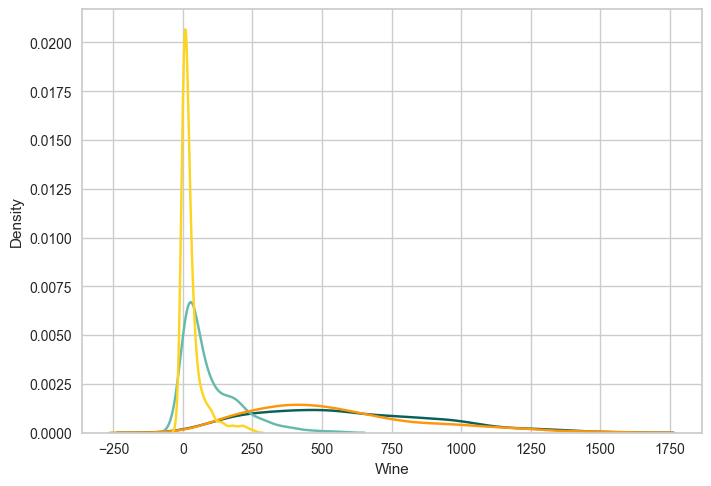

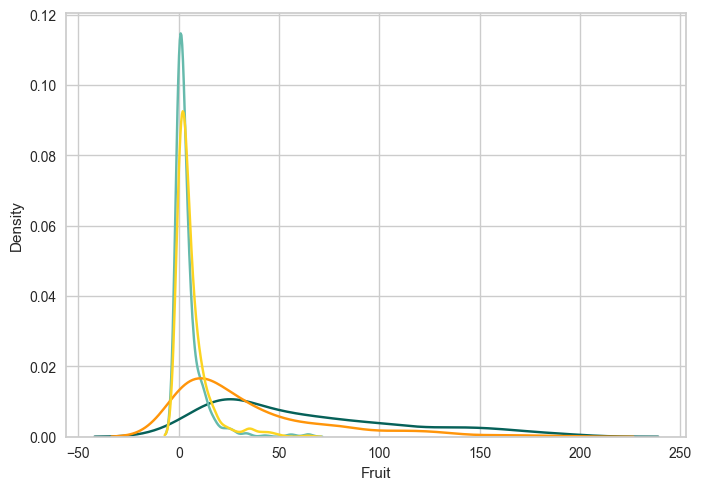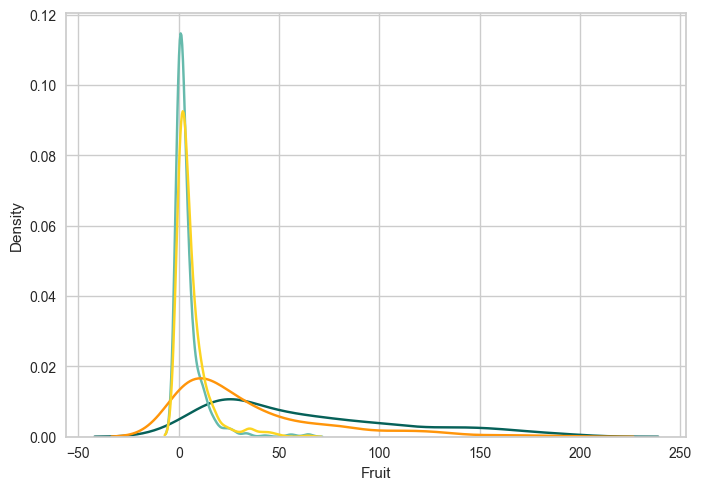

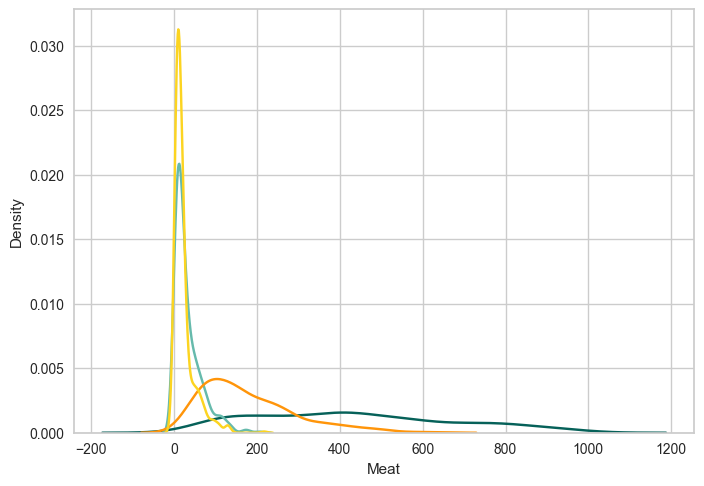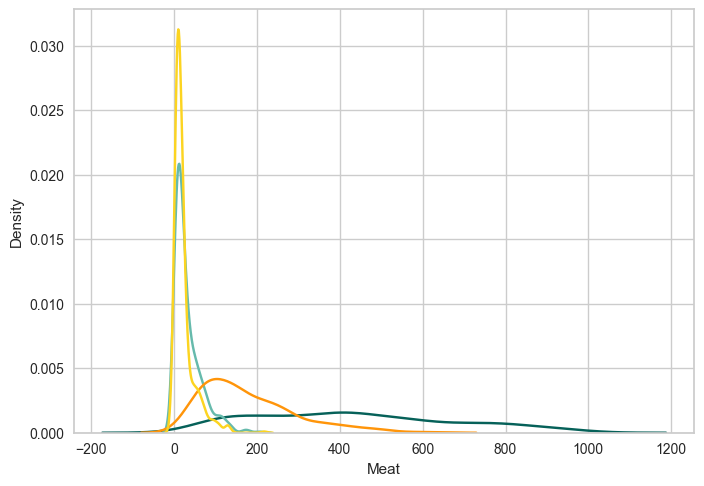

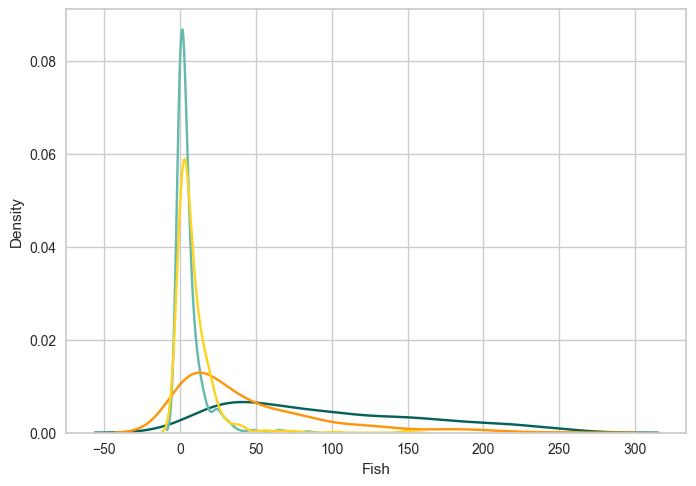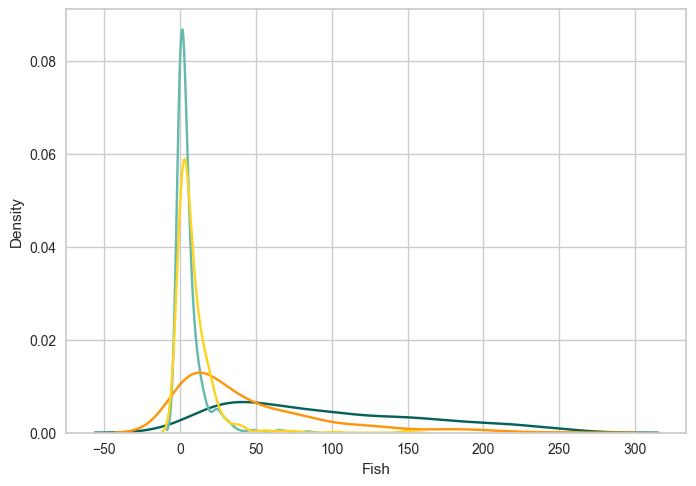

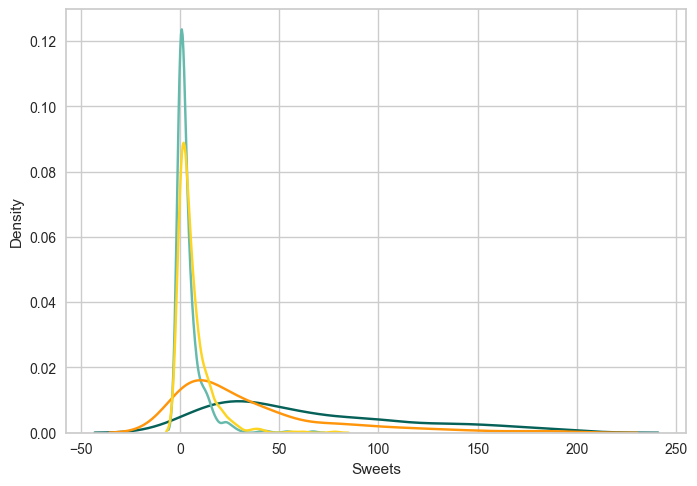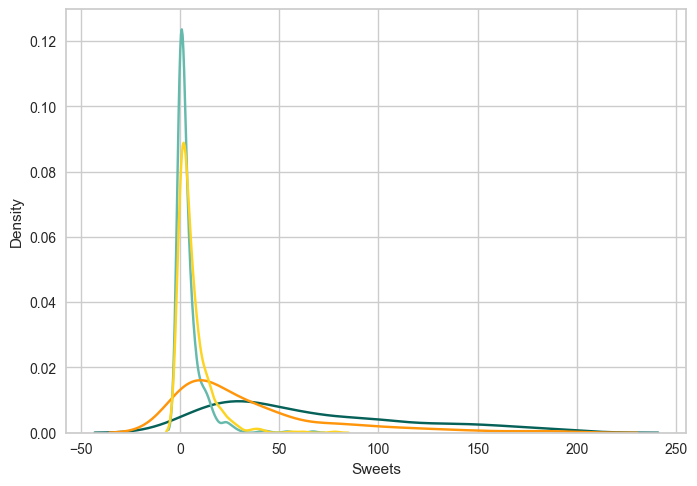

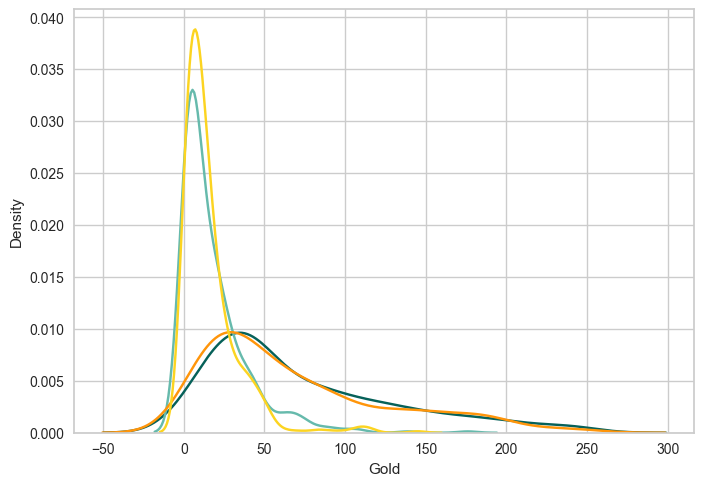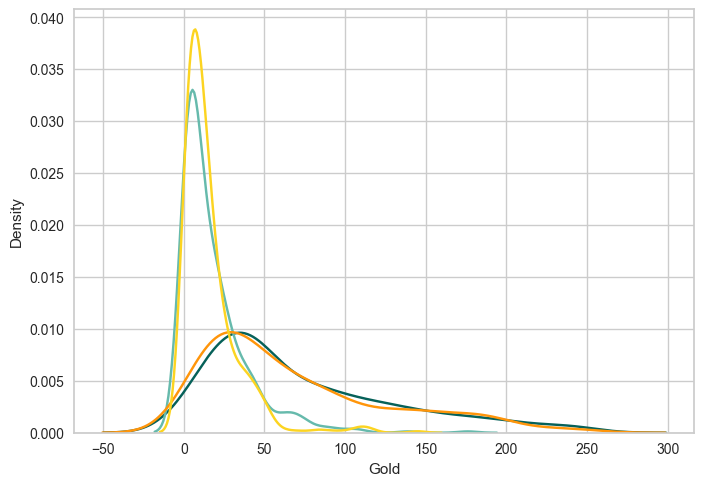

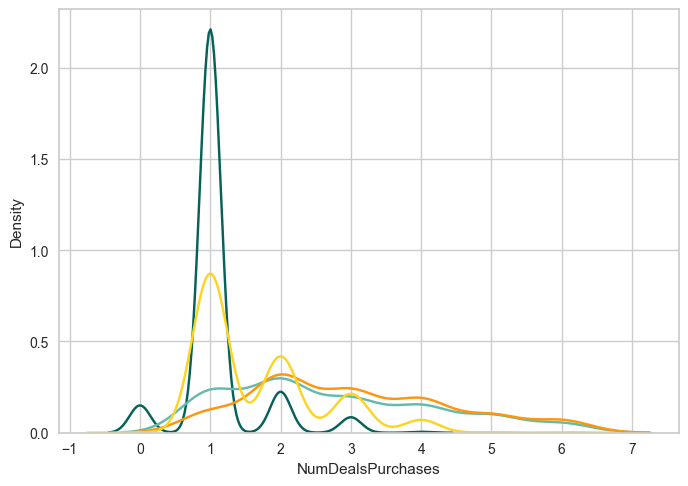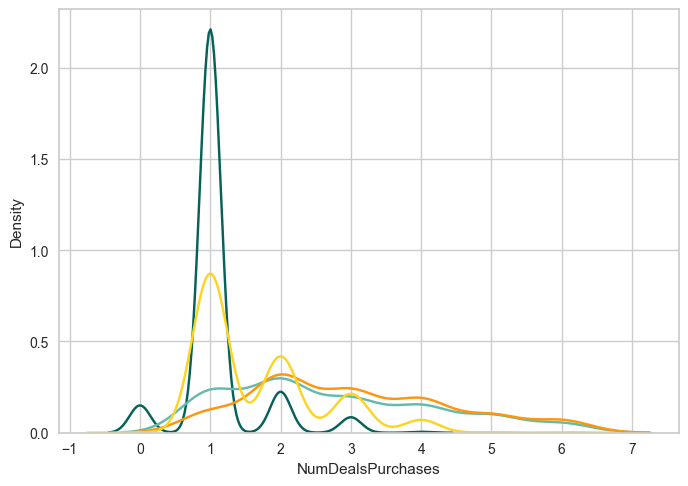

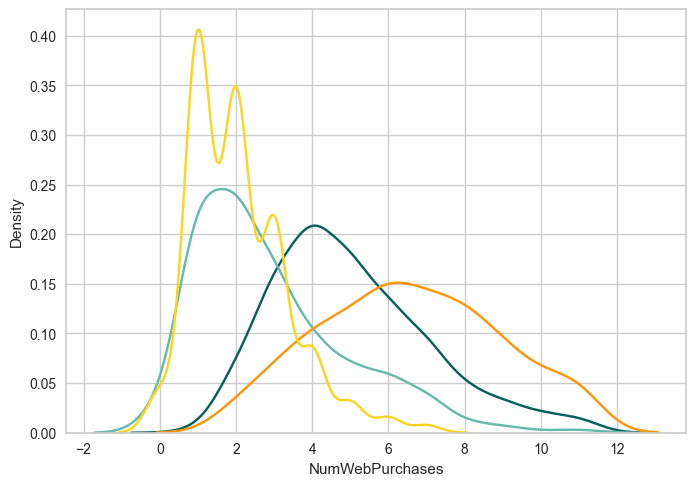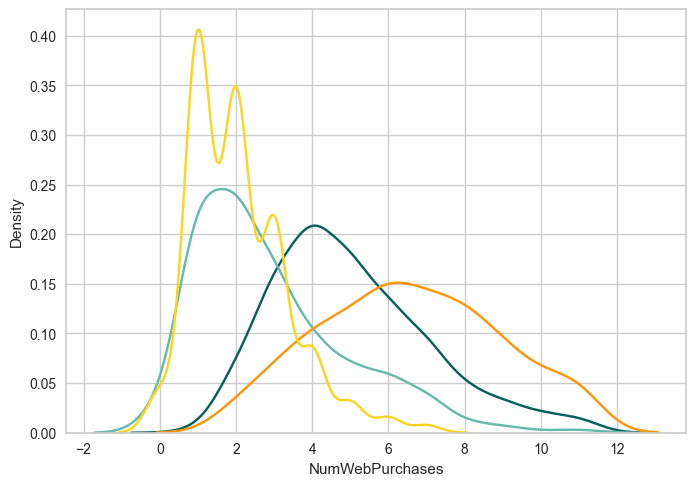

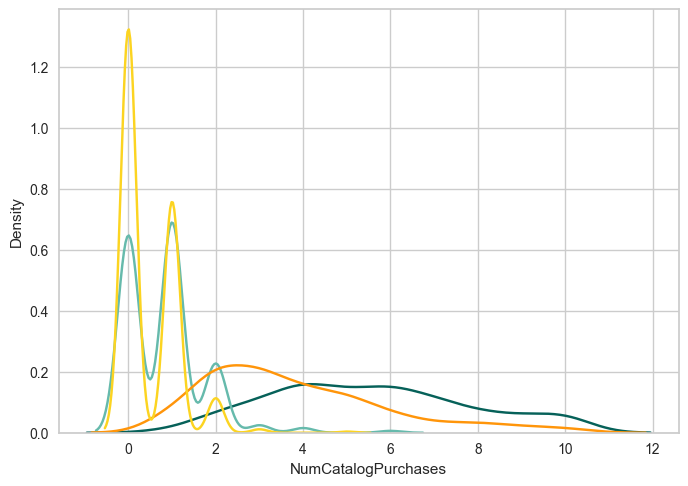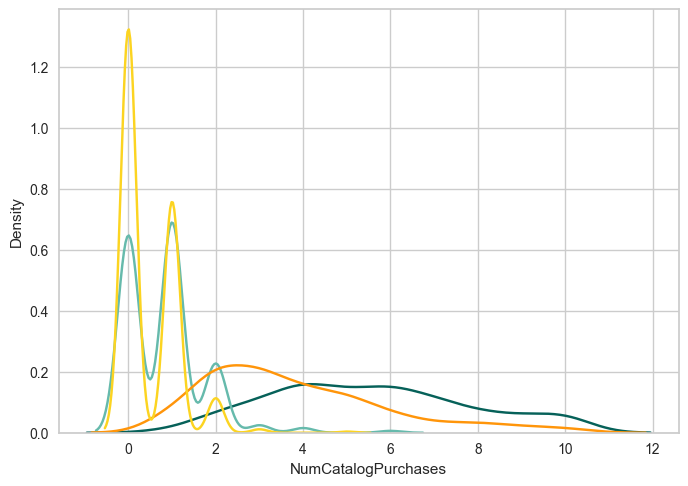

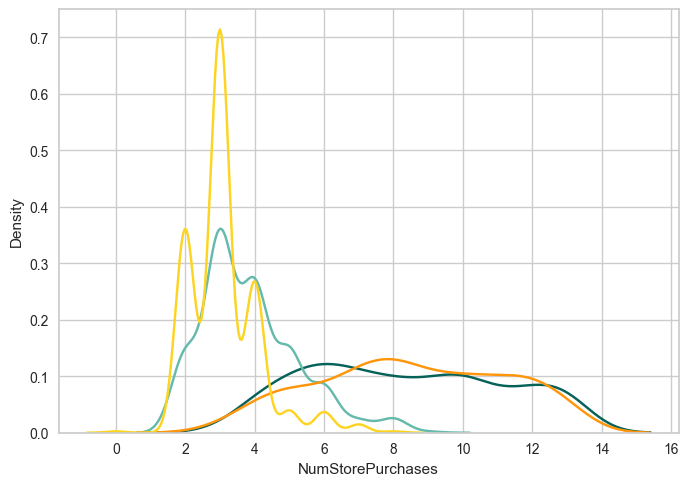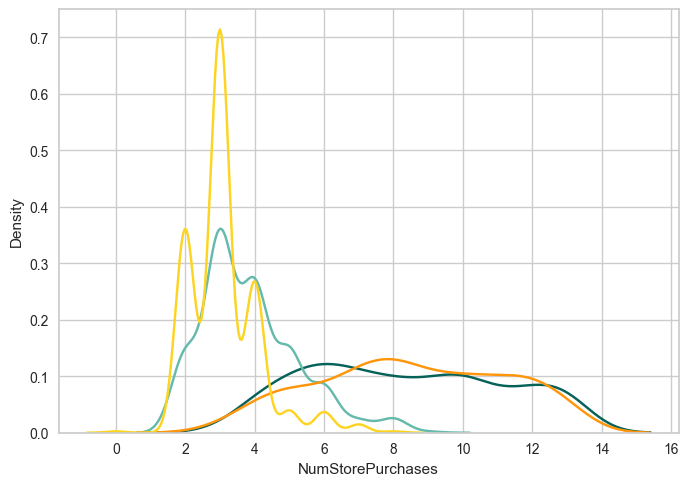

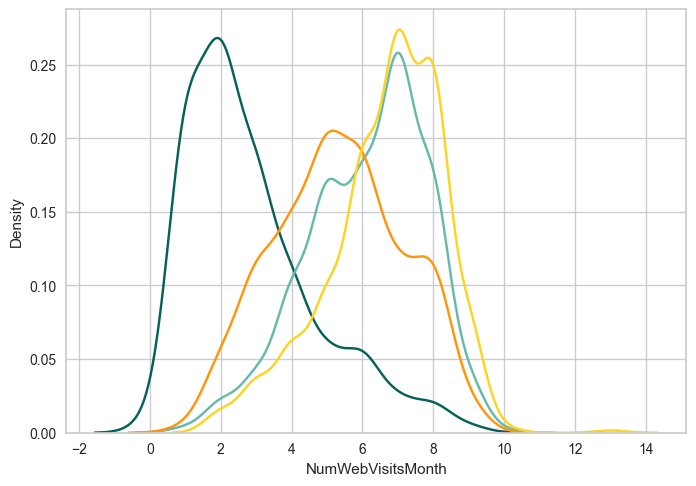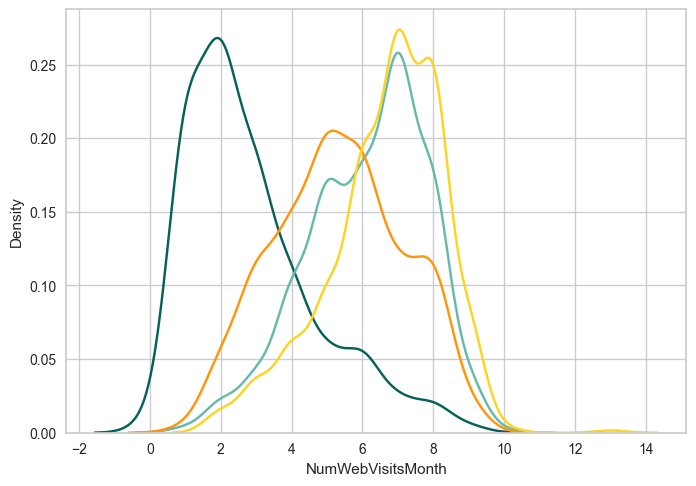

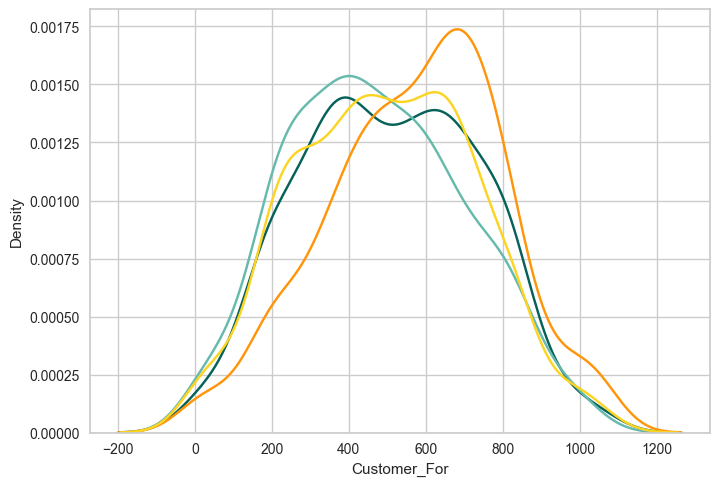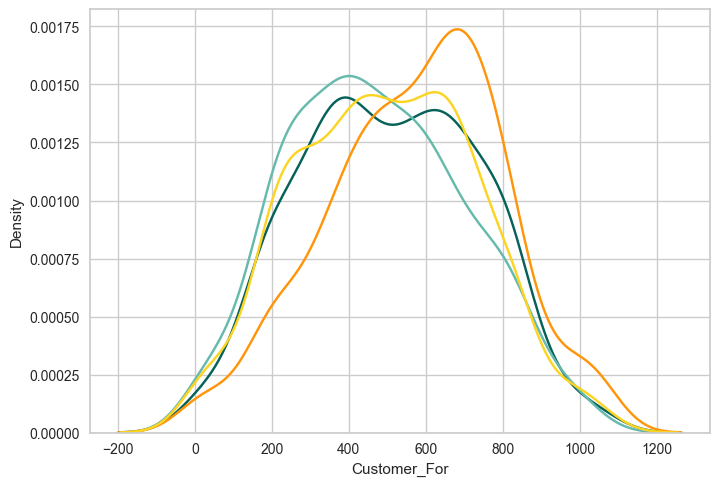

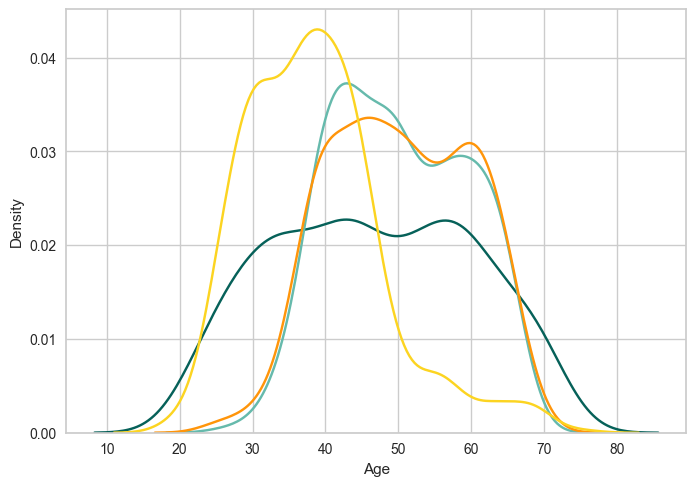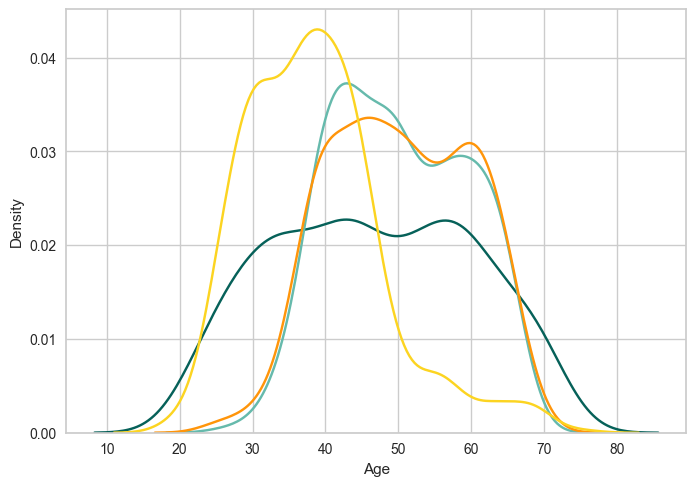

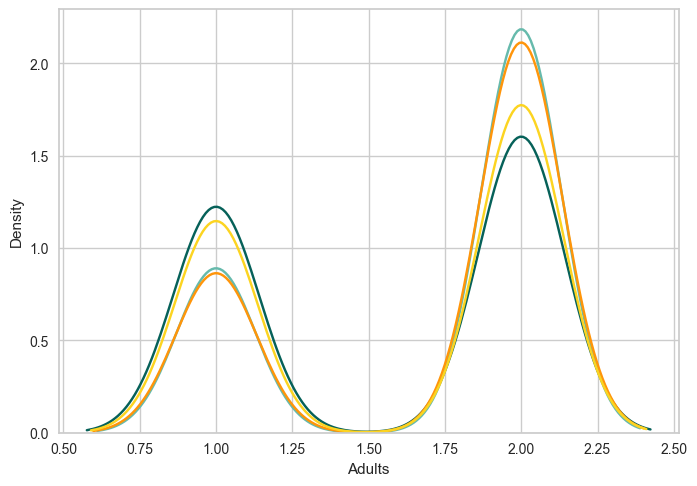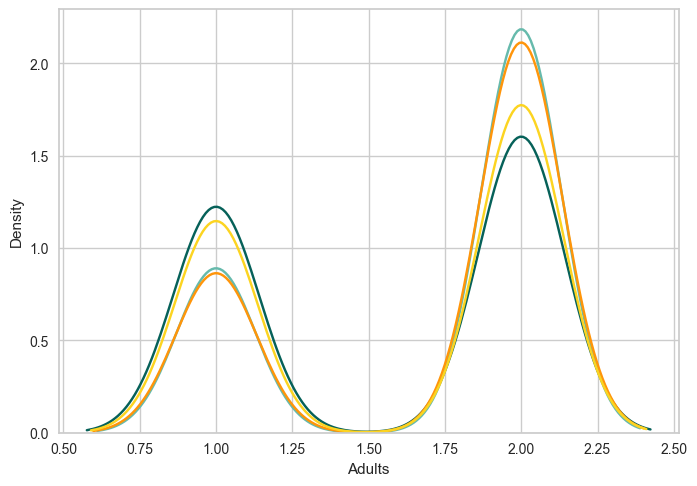

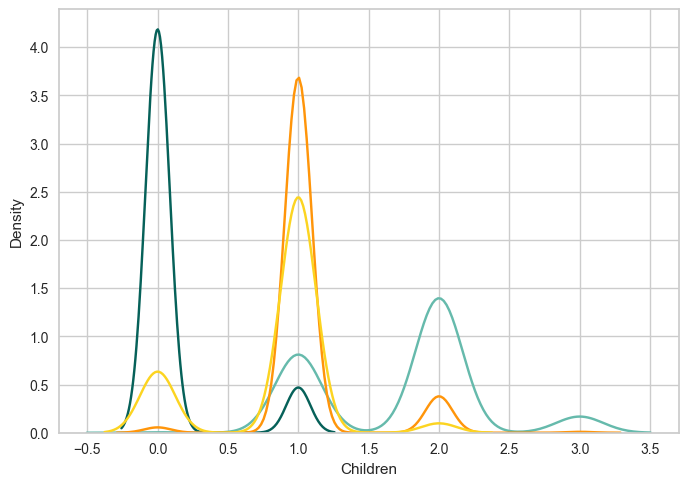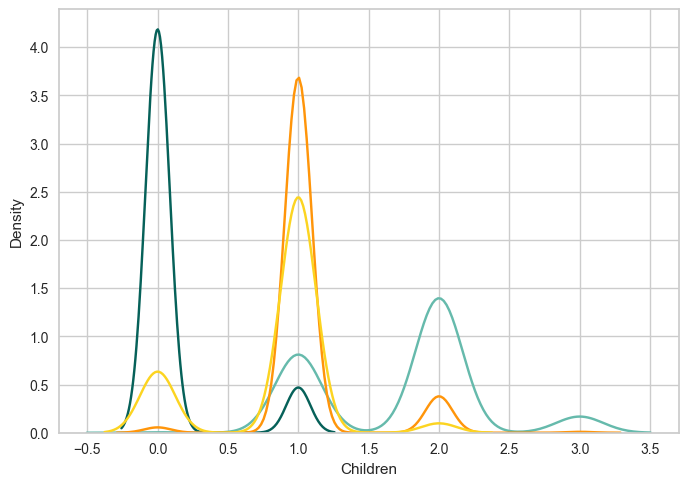

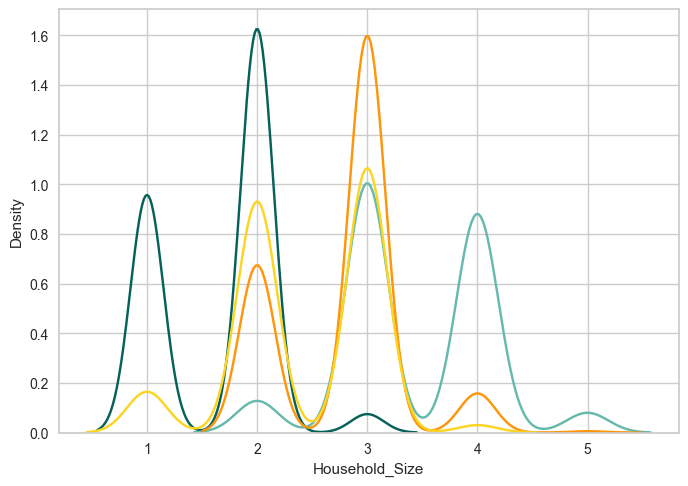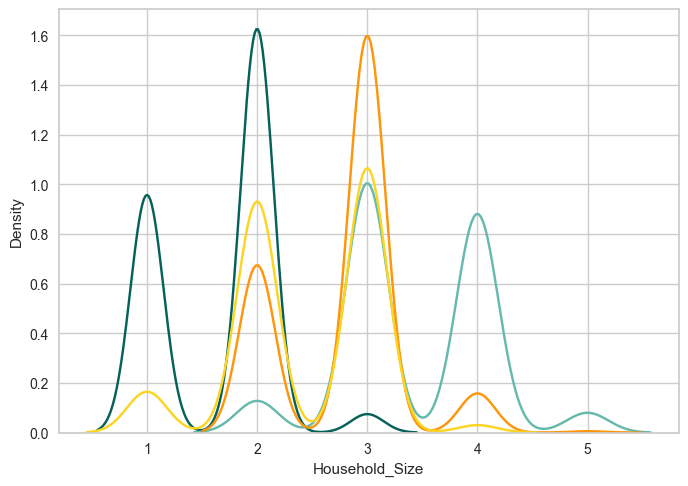

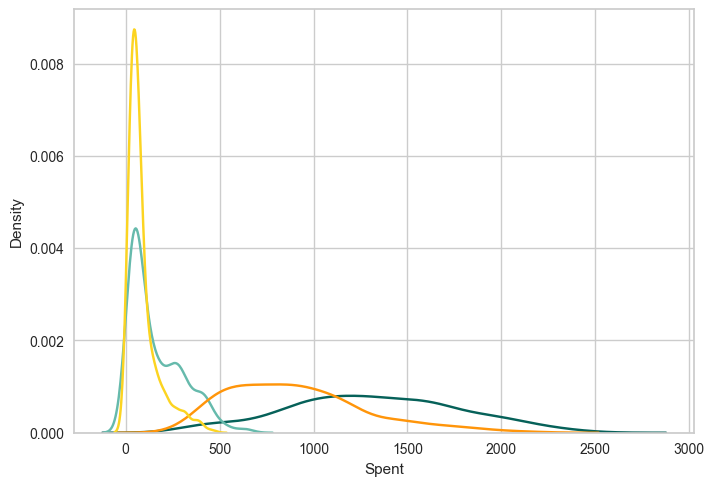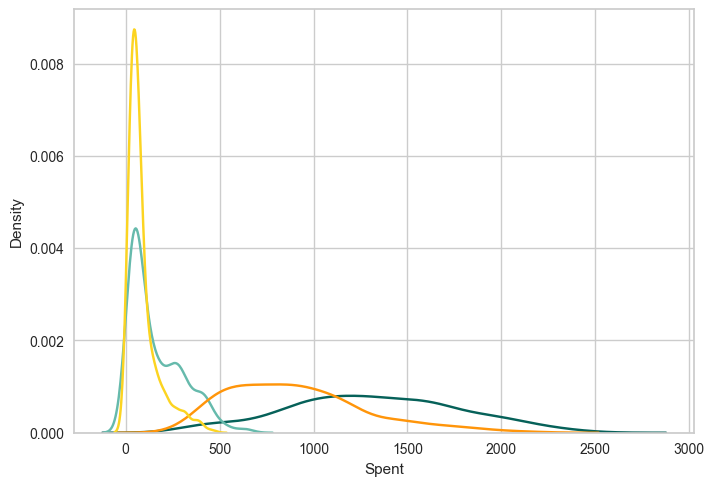

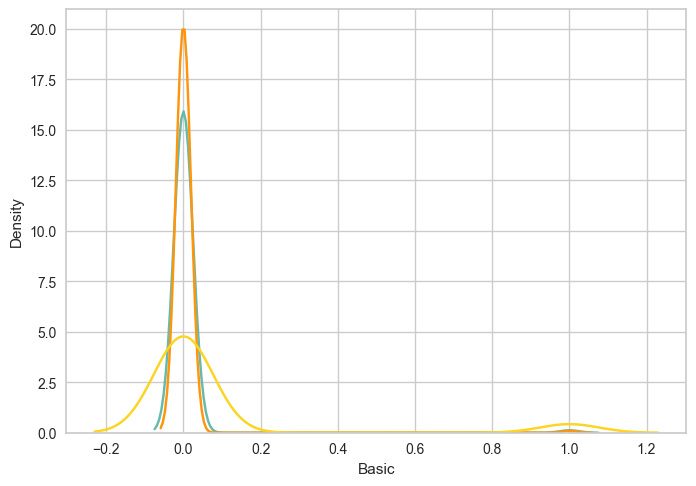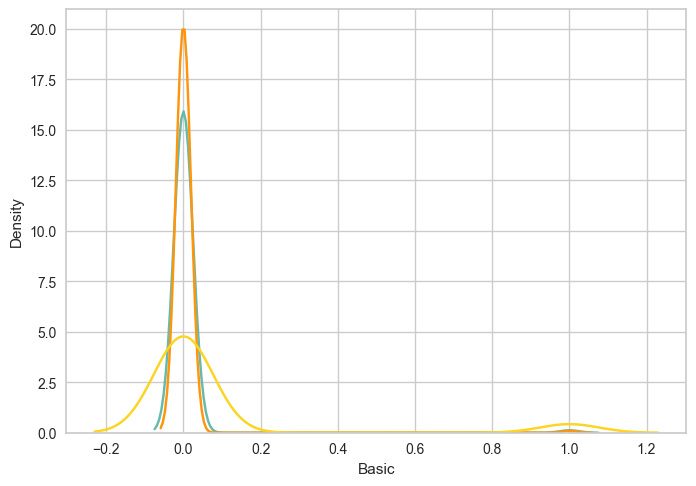

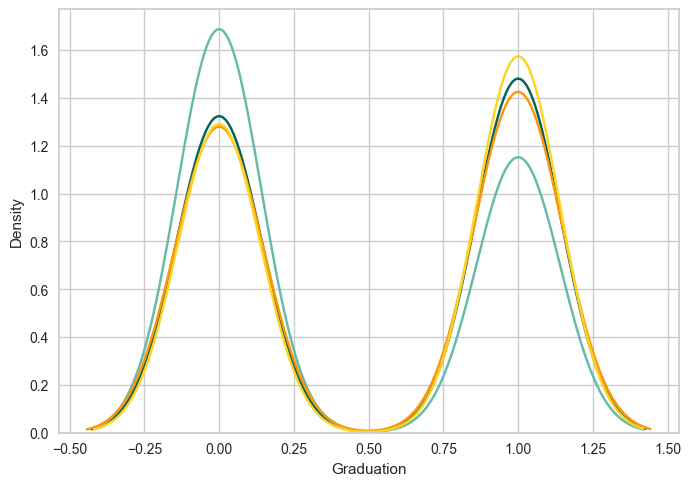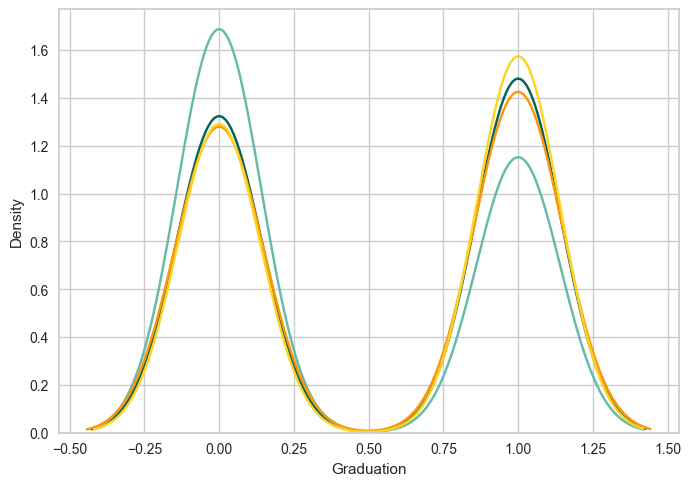

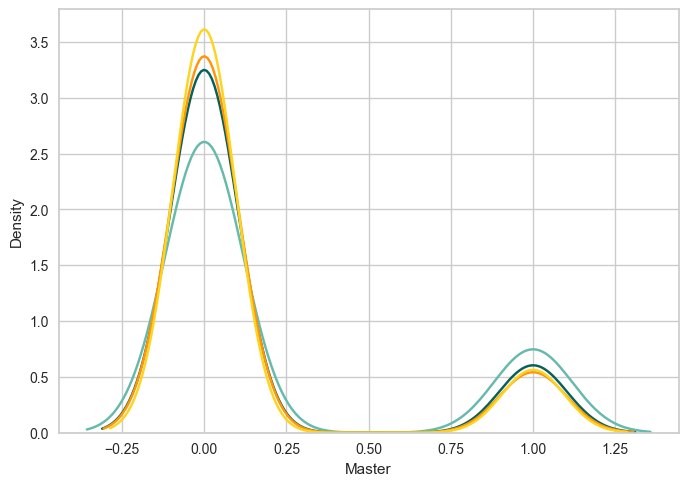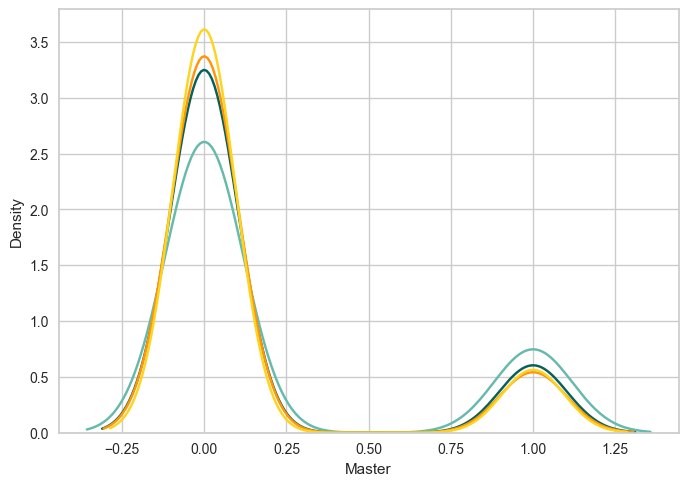

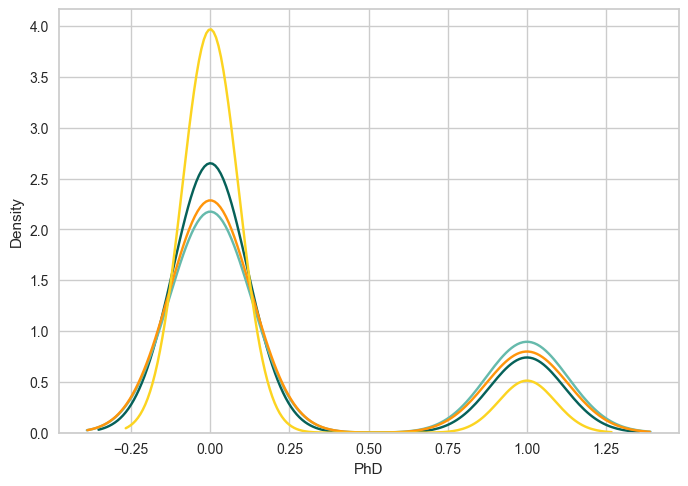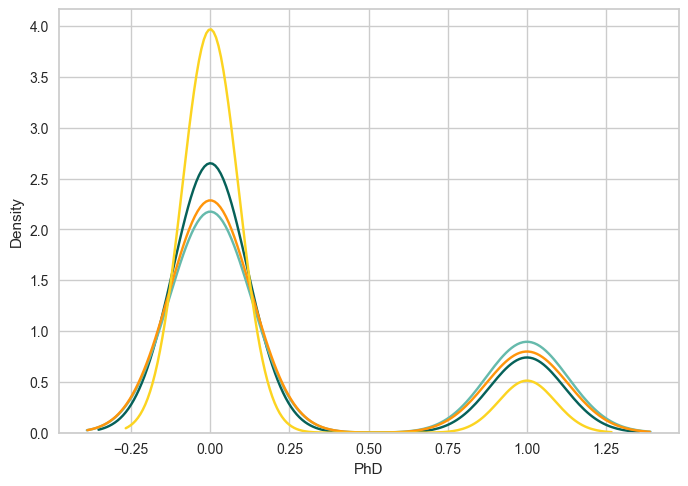